In [414]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [415]:
digits = cv2.imread('../datasets/digits.png', 0)

In [416]:
print(digits.shape)

(1000, 2000)


In [417]:
images = [np.hsplit(row, 100)
    for row in np.vsplit(digits, 50)]
images = np.array(images, dtype=np.float32)
print(images.shape)

(50, 100, 20, 20)


In [418]:
train_features = images[:, :50].reshape(-1, (20 * 20))
print(train_features.shape)

(2500, 400)


In [419]:
test_features = images[:, 50:100].reshape(-1, (20 * 20))
print(test_features.shape)

(2500, 400)


In [420]:
k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

In [421]:
knn = cv2.ml.KNearest_create()

In [422]:
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

In [423]:
ret, result, neighbors, dist = knn.findNearest(test_features, 3)

In [424]:
#check if the results are correct
matches = np.equal(result, test_labels)

#convert bool to int
matches = matches.astype(np.int)

#count the correct predictions
correct= np.count_nonzero(matches)

#compute the accuracy
accuracy = (correct * 100.00) / result.size

In [425]:
print('Accuracy []', format(accuracy))

Accuracy [] 91.64


In [426]:
model = cv2.ml.SVM_create()

In [427]:
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

In [428]:
#training SVM1
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

In [429]:
#Using trained SVM
result = model.predict(test_features)

In [430]:
matches = np.equal(result[1], test_labels)
                   
#convert bool to int
matches = matches.astype(np.int)

#count the correct predictions
correct= np.count_nonzero(matches)

#compute the accuracy
accuracy = (correct * 100.00) / result[1].size

In [431]:
print('Accuracy []', format(accuracy))

Accuracy [] 90.44


In [432]:
train_features -= np.mean(train_features, axis=0)
test_features -= np.mean(train_features, axis=0)

In [433]:
pca = PCA(n_components=100)

In [434]:
train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))

In [435]:
pca.fit(train_features)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

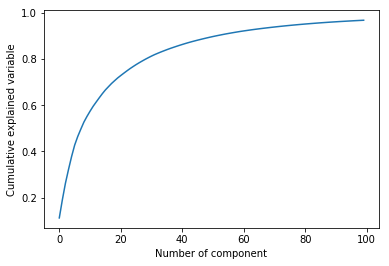

In [445]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of component')
plt.ylabel('Cumulative explained variable')
plt.show()

In [446]:
train_features.shape

(2500, 100)

In [448]:
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

ValueError: operands could not be broadcast together with shapes (2500,100) (400,) 

In [449]:
train_features.shape, test_features.shape

((2500, 100), (2500, 100))

In [450]:
print('Accuracy []', format(accuracy))

Accuracy [] 91.76


In [440]:
inverse_pca = pca.inverse_transform(train_features)
plt.imshow(train_features[0].reshape(20,20), cmap='gray')
plt.show()

ValueError: cannot reshape array of size 100 into shape (20,20)

In [451]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('../datasets/digits.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
# Make it into a Numpy array. It size will be (50,100,20,20)
x = np.array(cells)
# Now we prepare train_data and test_data.
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)
# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()
# Initiate kNN, train the data, then test it with test data for k=1
knn = cv.ml.KNearest_create()
knn.train(train, cv.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=5)
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print( accuracy )

91.76
